## Linear Regression Without Sklearn

#### Lets create a Fahrenheit prediction model where Celsius is Feature.
`Feature`=`input` and `Label`=`output`

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [54]:
celsius_feature = np.arange(20,80)
fahren_label = (celsius_feature * 1.8) + 32

In [55]:
df = pd.DataFrame({"Feature":celsius_feature,"Label":fahren_label})

In [56]:
df.sample(10)

,Feature,Label
10,30,86.0
19,39,102.2
13,33,91.4
17,37,98.6
27,47,116.6
32,52,125.6
44,64,147.2
5,25,77.0
51,71,159.8
34,54,129.2


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Feature  60 non-null     int64  
 1   Label    60 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


In [58]:
X = df['Feature']
Y = df.Label   #two ways to 

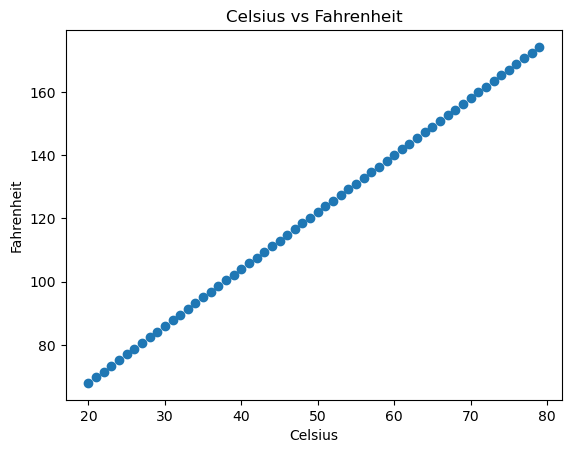

In [59]:
plt.scatter(X.values,Y.values)
plt.title("Celsius vs Fahrenheit")
plt.xlabel("Celsius")
plt.ylabel("Fahrenheit")
plt.show()

### 1. Data Preprocessing

- Remove the missing value
- Scale numerical data type and Encode categorical data type
- Split the Data

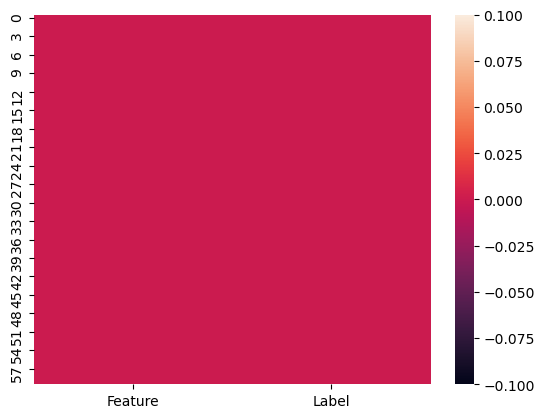

In [60]:
import seaborn as sns

sns.heatmap(df.isnull())
plt.show()

We have no empty values and moreover we have single feature and that belongs to Numerical Data type

### Scale the Numerical Data

Formula:

$scale_x = \frac{x - \mu}{\sigma}$

where x is feature; $\mu$ = mean; $\sigma$ = standard deviation

In [61]:
#StandardScalar
class StandardScalar():
    def fit_transform(self,x):
        mean = np.mean(x)
        std_dev = np.std(x)
        return (x-mean)/std_dev

In [62]:
sc = StandardScalar()
x = sc.fit_transform(X)

In [63]:
x[:5]

0   -1.703420
1   -1.645677
2   -1.587934
3   -1.530191
4   -1.472448
Name: Feature, dtype: float64

In [64]:
type(x)

pandas.core.series.Series

In [65]:
x = x.to_numpy()

In [66]:
Y = Y.values

In [67]:
y = sc.fit_transform(Y)

In [68]:
y

array([-1.7034199 , -1.64567685, -1.5879338 , -1.53019075, -1.47244771,
       -1.41470466, -1.35696161, -1.29921857, -1.24147552, -1.18373247,
       -1.12598942, -1.06824638, -1.01050333, -0.95276028, -0.89501723,
       -0.83727419, -0.77953114, -0.72178809, -0.66404504, -0.606302  ,
       -0.54855895, -0.4908159 , -0.43307286, -0.37532981, -0.31758676,
       -0.25984371, -0.20210067, -0.14435762, -0.08661457, -0.02887152,
        0.02887152,  0.08661457,  0.14435762,  0.20210067,  0.25984371,
        0.31758676,  0.37532981,  0.43307286,  0.4908159 ,  0.54855895,
        0.606302  ,  0.66404504,  0.72178809,  0.77953114,  0.83727419,
        0.89501723,  0.95276028,  1.01050333,  1.06824638,  1.12598942,
        1.18373247,  1.24147552,  1.29921857,  1.35696161,  1.41470466,
        1.47244771,  1.53019075,  1.5879338 ,  1.64567685,  1.7034199 ])

### Split The Data
- Training Data: 80%
- Testing Data: 20%
    
We shall discuss about Validation data set later in this course

In [76]:
train_size = int(0.8*len(x))
# or test_size = int(0.2*len(x))

size = list(range(len(x)))
np.random.shuffle(size)
x = x[size]
y = y[size]

In [75]:
x[:10]

array([ 1.5879338 , -1.29921857, -0.08661457, -0.20210067,  0.606302  ,
       -0.54855895, -1.12598942,  0.25984371,  0.77953114,  1.35696161])

In [74]:
y[:10]

array([ 1.5879338 , -1.29921857, -0.08661457, -0.20210067,  0.606302  ,
       -0.54855895, -1.12598942,  0.25984371,  0.77953114,  1.35696161])

In [77]:
x_train = x[0:train_size].reshape(-1,1)
y_train = y[0:train_size].reshape(-1,1)
x_test = x[train_size:].reshape(-1,1)
y_test = y[train_size:].reshape(-1,1)

In [78]:
x_train.shape

(48, 1)

In [79]:
y_train.shape

(48, 1)

In [80]:
x_test.shape

(12, 1)

In [81]:
y_test.shape

(12, 1)

### Initialize Weights and Bias

Remember the shape for Weights and Bias are very cruical. The x is in form of (n,m) where n is number of n values and m is feature

In [82]:
# we shall first define initial values for Weights and Biases
m = x_train.shape[1]
W = 0.01 * np.random.randn(m,1)
b = np.zeros((1, 1))

In [83]:
W.shape

(1, 1)

In [84]:
b.shape

(1, 1)

### Train the Model

***Formula***: 

* $\hat{y} = W*X + b$

In [85]:
y_pred = np.dot(x_train,W) + b

In [86]:
y_pred.shape

(48, 1)

In [87]:
y_train.shape

(48, 1)

### Calculate Loss And Cost Function

`Loss Function` and `Cost function` both measure how much is our prediction value different than actual output. The loss function is defined as the measure of how well your model is performing on a training example. But if we consider the entire training set and try to measure how well is our model performing on it, we define a function called the cost function. Mathematically the cost function is the average of the loss function for the entire training set. In other words, the loss function measures the error for a single training example, the cost function measures the average error for the entire training set.

**Formula:**

$J(\theta) = MSE = \frac{1}{N} \sum_{i-1}^{N} (y_i - \hat{y}_i)^2 $

In [112]:
def loss(y_train,y_pred):
    N = len(y_train)
    loss = (1/N) * np.sum((y_pred - y_train)**2)
    return loss

### Gradient Descent

Gradient Descent is method using which we can reduce the cost function and find the optimized linear line

- $J(\theta) = \frac{1}{N} \sum_i (y_i - \hat{y}_i)^2  = \frac{1}{N}\sum_i (y_i - X_iW)^2 $

Update Weight and Bias

We update weights and biases during Gradient Descent

- $\frac{\partial{J}}{\partial{W}} = -\frac{2}{N} \sum_i (y_i - X_iW) X_i = -\frac{2}{N} \sum_i (y_i - \hat{y}_i) X_i$
- $\frac{\partial{J}}{\partial{b}} = -\frac{2}{N} \sum_i (y_i - X_iW)1 = -\frac{2}{N} \sum_i (y_i - \hat{y}_i)1$

- $W = W - \alpha\frac{\partial{J}}{\partial{W}}$
- $b = b - \alpha\frac{\partial{J}}{\partial{b}}$

Learning Rate($\alpha$) is the step size

Read Full Blog to understand Gradient Descent and What is Learning Rate:
[Anime Vyuh- Linear Regression](https://animevyuh.org/linear-regression/)

In [113]:
def optimize(W,b,x_train,y_train,learning_rate,y_pred):
    N = len(y_train)
    dW = -(2/N) * np.sum((y_train - y_pred) * x_train)
    db = -(2/N) * np.sum((y_train - y_pred))
    W += -learning_rate* dW
    b += -learning_rate* db
    
    grad = {"dW":dW,"db":db}
    update = {"W":W,"b":b}
    return grad,update

In [126]:
def predict(W,b,X):
    prediction = np.dot(X,W) + b
    return prediction

In [127]:
num_of_iterations = 201 #change and see this difference
learning_rate = 0.01
W = 0.01 * np.random.randn(m,1)
b = np.zeros((1, 1))

for i in range(num_of_iterations):
    y_pred = np.dot(x_train, W) + b
    loss_func = loss(y_train,y_pred)
    
    if i%20 == 0:
        print(f"Iteration:{i}, Loss: {loss_func}")
    
    gradient,change = optimize(W,b,x_train,y_train,learning_rate,y_pred)
    dW = gradient["dW"]
    db = gradient['db']
    W = change["W"]
    b = change["b"]
    
train_predict = predict(W,b,x_train)
test_predict = predict(W,b,x_test)

Iteration:0, Loss: 1.042382943212044
Iteration:20, Loss: 0.46713182810852516
Iteration:40, Loss: 0.20955990807580854
Iteration:60, Loss: 0.0941088407013696
Iteration:80, Loss: 0.042306015093884576
Iteration:100, Loss: 0.01903787152982944
Iteration:120, Loss: 0.00857577733682608
Iteration:140, Loss: 0.003866881748162627
Iteration:160, Loss: 0.0017453128449044343
Iteration:180, Loss: 0.0007885018059327778
Iteration:200, Loss: 0.000356566463463677


### Evaluation Metrics

The mostly used Evaluation metrics for Regression Models are:
- Mean Squared Error (MSE)
- Mean Absolute Error (MAE)
- Root Mean Squared Error (RMSE)

In [130]:
train_mse = np.mean((y_train - train_predict) ** 2)
test_mse = np.mean((y_test - test_predict) ** 2)
print(f"Train MSE: {train_mse}, Test MSE: {test_mse}")

Train MSE: 0.0003427030277237411, Test MSE: 0.00037724484334067436


In [131]:
train_rmse = np.mean((y_train - train_predict) ** 2)
test_rmse = np.mean((y_test - test_predict) ** 2)
print(f"Train MSE: {np.sqrt(train_rmse)}, Test MSE: {np.sqrt(test_rmse)}")

Train MSE: 0.018512239943446637, Test MSE: 0.019422791852374735


In [137]:
def repeat(type_graph):
    plt.title(type_graph)
    plt.xlabel("Celsius")
    plt.ylabel("Fahrenheit")
    plt.legend(loc="lower right")

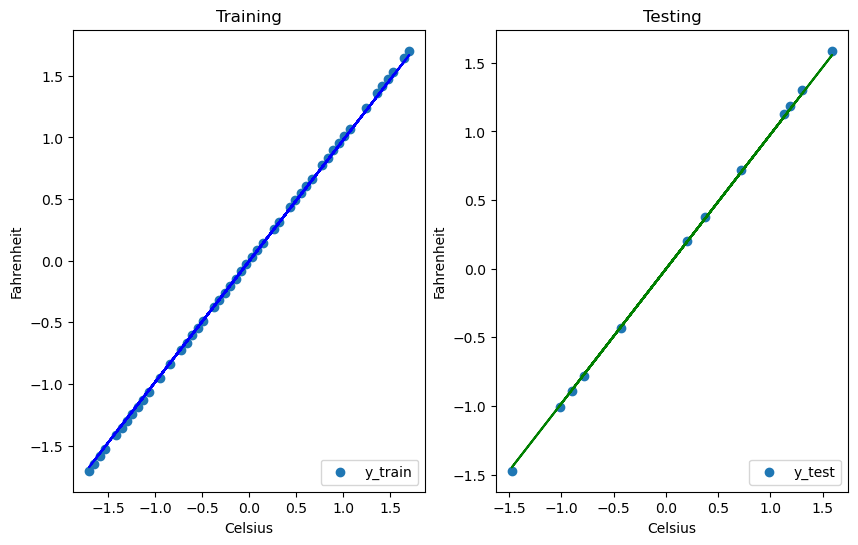

In [144]:
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
plt.scatter(x_train, y_train,label="y_train")
plt.plot(x_train,train_predict, color="blue")
repeat("Training")

plt.subplot(1,2,2)
plt.scatter(x_test, y_test, label='y_test')
plt.plot(x_test, test_predict, color="green")
repeat("Testing")

# Show plots
plt.show()